# Enter Student Name & ID

In [1]:
student_id = 99109111  #@param {type:"integer"}
student_name = "Ali Yousefi" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99109111
your name: Ali Yousefi


### 1.1 Complete the function below using only the `numpy` library.

## Part 1. Implementing Your Own PCA Function.

In [156]:
import numpy as np
from scipy import misc
from sklearn.preprocessing import StandardScaler


In [232]:
def myPCA(X, num_components):
    """
    Performs Principal Component Analysis (PCA) on the input data X.
    
    Parameters:
    X (numpy.ndarray): The input data matrix of shape (n_samples, n_features).
    num_components (int): The number of principal components to retain.
    
    Returns:
    numpy.ndarray: The transformed data matrix of shape (n_samples, num_components).
    numpy.ndarray: The principal components of shape (n_features, num_components).
    """
    # Step 1: Standardize the data

    X_centered = X - np.mean(X, axis=0)
    X_centered.reshape(X_centered.shape[0], -1)
    
    # Step 2: Compute the covariance matrix
    cov_matrix = np.cov(X_centered.T)
    
    # Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvectors = eigenvectors.real
    eigenvalues = eigenvalues.real
    
    # Step 4: Sort the eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Step 5: Select the top k eigenvectors as the principal components
    principal_components = eigenvectors[:, :num_components]
    
    # Step 6: Project the data onto the principal components
    transformed_data = np.dot(X_centered, principal_components)
    
    
    return transformed_data,principal_components

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [74]:
import matplotlib as plt
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

(150, 2)


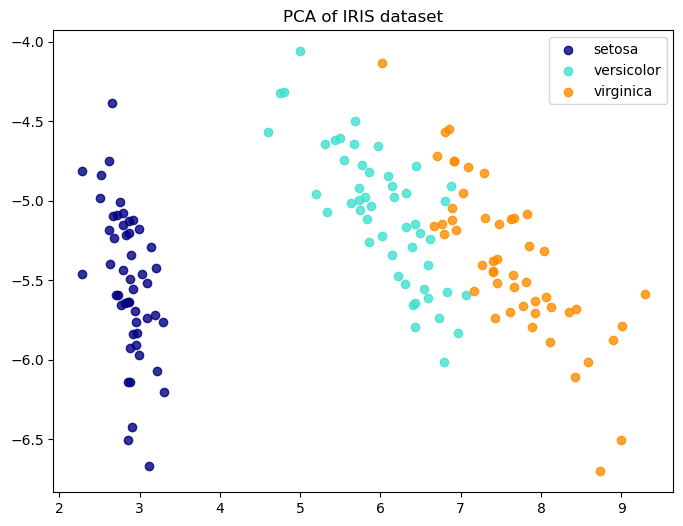

In [165]:
# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Perform PCA on the data
X_pca = myPCA(X,2)
print(X_pca.shape)

# Plot the results
plt.figure(figsize=(8, 6))
for i, color in zip(range(len(set(y))), ["navy", "turquoise", "darkorange"]):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1], alpha=0.8, color=color, label=iris.target_names[i]
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `The key idea behind eigenfaces is that the high-dimensional face image space can be effectively represented by a small number of eigenfaces, which capture the most important modes of variation in the face images. This allows for efficient storage and processing of face images, as well as effective face recognition by comparing the coefficients of new face images with those of known individuals in a database.

In summary, eigenfaces are the principal components obtained from PCA on a set of face images, and they provide a compact and effective representation of face images that can be used for various face-related tasks, such as recognition, clustering, and dimensionality reduction.


### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [221]:
import cv2
import numpy as np
from PIL import Image

# Initialize lists to store the images and labels
images1 = []
labels1= []
images2 = []
labels2= []

# Iterate over the folders
for folder in range(40):
    # Iterate over the images in the folder
    for image in range(10):
        if image<5 :
            # Read the image
            img = cv2.imread(f"Q1/ORL/s{folder+1}/{image+1}.bmp",cv2.IMREAD_GRAYSCALE)
            # Convert the image to a numpy array
            img_array = np.array(img)

            # Add the image to the list
            images1.append(img_array)

            # Add the label to the list
            labels1.append(folder)
        else:
                        # Read the image
            img = cv2.imread(f"Q1/ORL/s{folder+1}/{image+1}.bmp",cv2.IMREAD_GRAYSCALE)
            # Convert the image to a numpy array
            img_array = np.array(img)
            # Add the image to the list
            images2.append(img_array)

            # Add the label to the list
            labels2.append(folder)

# Convert the lists to numpy arrays
images1 = np.array(images1)
labels1 = np.array(labels1)
images2 = np.array(images2)
labels2 = np.array(labels2)

# Split the data into training and test sets
X_train = images1
y_train = labels1
X_test = images2
y_test = labels2

print("Training set shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

X_train=X_train.reshape(200,-1)
X_test=X_test.reshape(200,-1)



Training set shape: (200, 48, 48)
Training labels shape: (200,)
Test set shape: (200, 48, 48)
Test labels shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [222]:


X_pca_test, principal1 = myPCA(X_test,40)

X_pca_train, principal = myPCA(X_train,40)


(2304, 2304)
(2304, 2304)


In [228]:
print(X_pca_train.shape)
print(principal.T.shape)
print(X_pca_train1.shape)
print(X_pca_train1.reshape(X_pca_train1.shape[0], -1).shape)

(200, 40)
(40, 2304)
(200, 2304)
(200, 2304)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [229]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#scaler = StandardScaler(with_mean=True, with_std=True)
#scaler.fit(X_pca_train)
#X_pca_train1 = scaler.transform(X_pca_train)
#scaler = StandardScaler(with_mean=True, with_std=True)
#scaler.fit(X_pca_test)
#X_pca_test1 = scaler.transform(X_pca_test)
X_pca_test1 =X_pca_test@ principal1.T
X_pca_train1=X_pca_train @ principal.T

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_pca_train1.reshape(X_pca_train1.shape[0], -1), y_train)

# Predict on the validation set
y_pred = lda.predict(X_pca_test1.reshape(X_pca_test1.shape[0], -1))
print('predicted:', y_pred)
print('test:', y_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Validation accuracy: {accuracy:.3f}")

predicted: [ 0  0  0  0  0  1  1  1  1  1  2 24  2  2  2  3  3  3  3 20  4  4  4  4
 39  5  5  5  5  5  6  6  6  6  6  7  7  7  0  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 39 11 11 20 12 12 12 12 13 25 13 13 13 14 14
 14 14 14 15  0 15 15 15 16 24 16 16 24 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23
 24 24 24 24 24 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28
 28 29 29 29 29 29 30 30 30 30 30 31 31 31 31 31 32 32 32 32 32 33 33 33
 33 33  4 39 34 34 34 35 23 35 35 35 36 36 36 36 36 37 37 37 37 37 38 38
 38 38 38 39 39 39 39 39]
test: [ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23
 24 24 2

In [230]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predict on the validation set
y_pred = lda.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Validation accuracy without pca: {accuracy:.3f}")

Validation accuracy without pca: 0.945


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [235]:
accuracy = []
for i in range(10):   
    X_pca_train,principal = myPCA(X_train,40+6*i)
    X_pca_test, principal1 = myPCA(X_test,40+6*i)
    X_pca_test1 =X_pca_test@ principal1.T
    X_pca_train1=X_pca_train @ principal.T


    lda = LinearDiscriminantAnalysis()
    lda.fit(X_pca_train1, y_train)

    y_pred = lda.predict(X_pca_test1)

    accuracy.append(accuracy_score(y_test, y_pred))
    print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print(accuracy)

Accuracy: 0.94
Accuracy: 0.91
Accuracy: 0.91
Accuracy: 0.91
Accuracy: 0.91
Accuracy: 0.92
Accuracy: 0.94
Accuracy: 0.94
Accuracy: 0.95
Accuracy: 0.95
[0.935, 0.91, 0.905, 0.91, 0.905, 0.92, 0.94, 0.94, 0.95, 0.95]


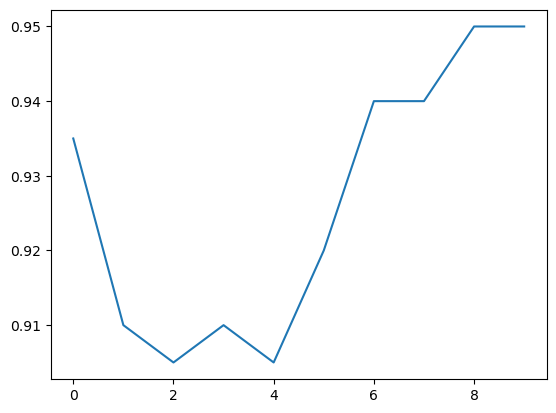

In [236]:
plt.plot(accuracy)

From these results, we can observe the following trends:

Accuracy Increases with More PCs:

 The accuracy generally increases as the number of PCs increases. This suggests that retaining more PCs can lead to better performance.

but in high PC numbers the accuracy does not significantly improves and the most effective PCS are the 40 first of those